In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import random
import os
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA

In [8]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

In [9]:
train_df = pd.read_csv('./train.csv')
train_df.drop([ 'X_02', 'X_48', 'X_47', 'X_23', 'X_11', 'X_10', 'X_04'], inplace= True, axis=1)

In [10]:
test_df = pd.read_csv('./test.csv')
test_df.drop([ 'X_02', 'X_48', 'X_47', 'X_23', 'X_11', 'X_10', 'X_04'], inplace= True, axis=1)

In [11]:
train_x = train_df.filter(regex='X') # Input : X Featrue
train_y = train_df.filter(regex='Y') # Output : Y_01 Feature..
test_x = test_df.filter(regex='X')
test_y = test_df.filter(regex='Y')

In [19]:
X_0506 = train_x[["X_05", "X_06"]]
train_x.drop(["X_05", "X_06"],axis=1,inplace=True)

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
X_0506

,X_05,X_06
0,101.892,74.983
1,101.944,72.943
2,103.153,72.943
3,101.971,77.022
4,101.981,70.904
...,...,...
39602,103.150,66.825
39603,102.021,66.825
39604,103.144,68.864
39605,102.025,67.845


In [20]:
pca = PCA()
pca.fit(X_0506)

PCA()

In [22]:
pcscore = pca.transform(X_0506)

In [23]:
pca.explained_variance_

array([5.11028253, 0.29719435])

AttributeError: 'Rectangle' object has no property 'colors'

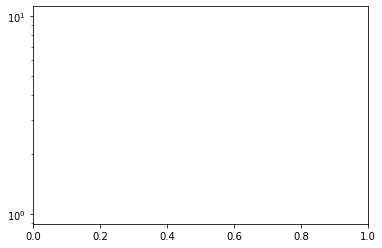

In [24]:
PC_ratio = pca.explained_variance_ratio_
PC_ratio_df = pd.DataFrame(PC_ratio)
PC_ratio_df.plot(kind='bar', logy=True, colors='r')